In [1]:
import numpy as np
import os
import rubin_sim.maf as maf
from rubin_scheduler.scheduler.surveys import generate_ddf_scheduled_obs
import pandas as pd

import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.plots as plots
import rubin_sim.maf.slicers as slicers

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
dbs = ['../baseline/baseline_v3.4_10yrs.db', '../ddf_loaded/ddf_loaded_fl4_v3.4_10yrs.db', 
      '../ddf_loaded_half/ddf_loaded_half_fl4_v3.4_10yrs.db', '../ddf_loaded_half/ddf_half_v3.4_10yrs.db',
      '../ddf_loaded_half/ddf_loaded_half_fl2_v3.4_10yrs.db']

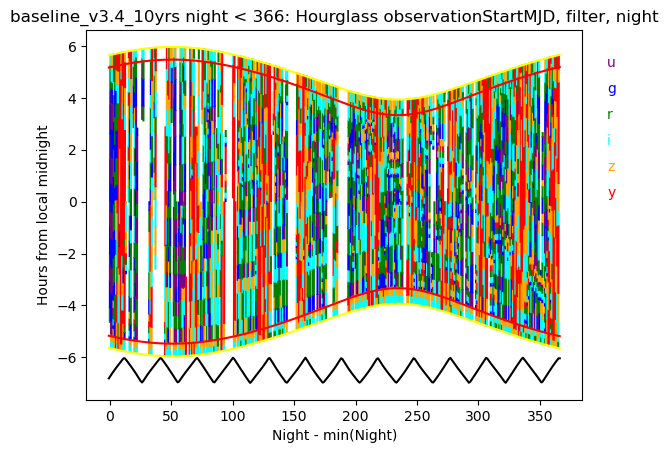

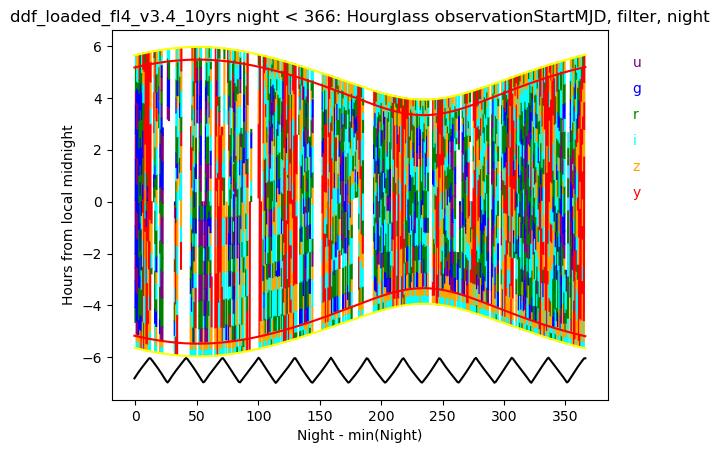

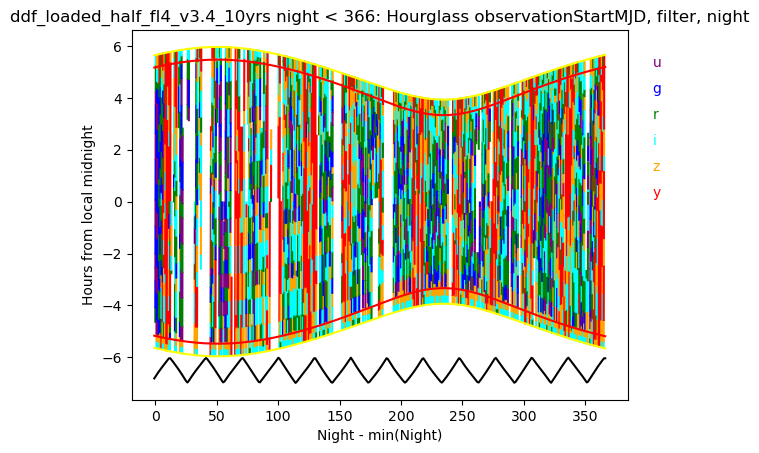

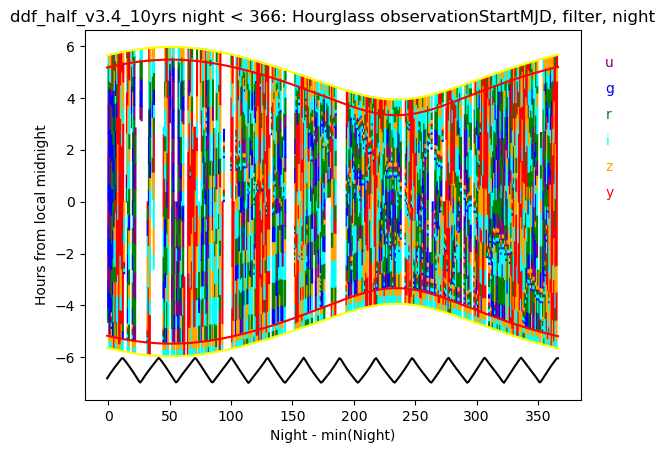

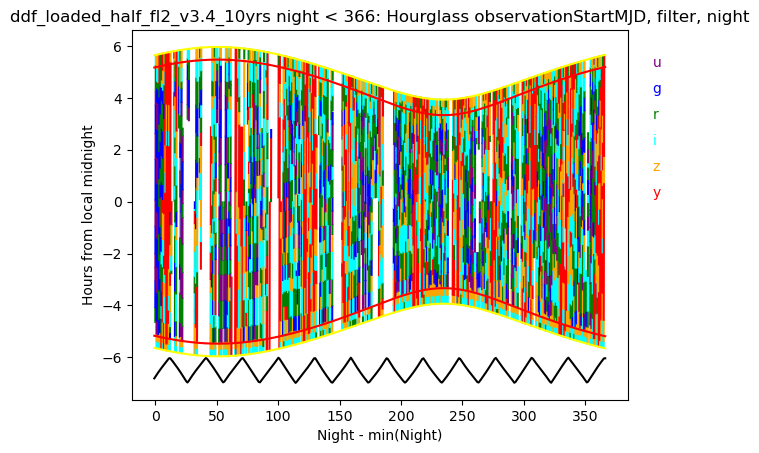

In [3]:
for db in dbs:
    run_name = os.path.basename(db).replace('.db', '')

    bundle_list = []
    
    slicer = maf.HourglassSlicer()
    metric = maf.HourglassMetric()

    bundle = maf.MetricBundle(
            metric,
            slicer,
            ' night < 366',run_name=run_name
        )
    bundle_list.append(bundle)


    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, db, 'ddf_loaded')
    mbg.run_all()
    mbg.plot_all(closefigs=False)

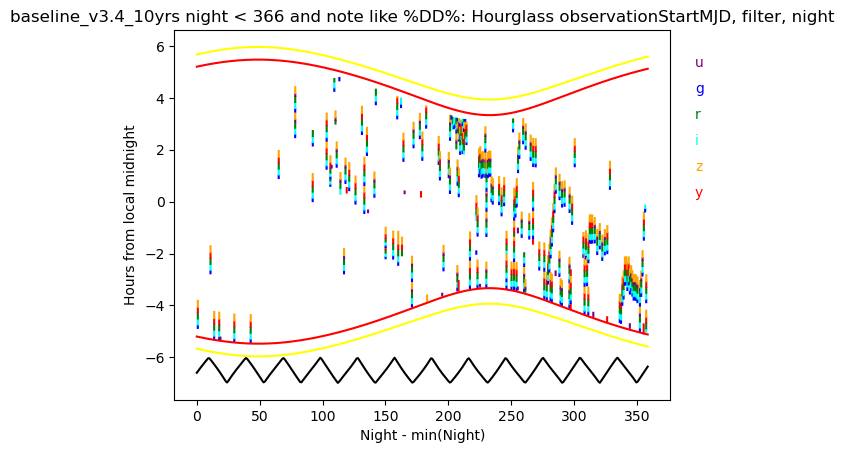

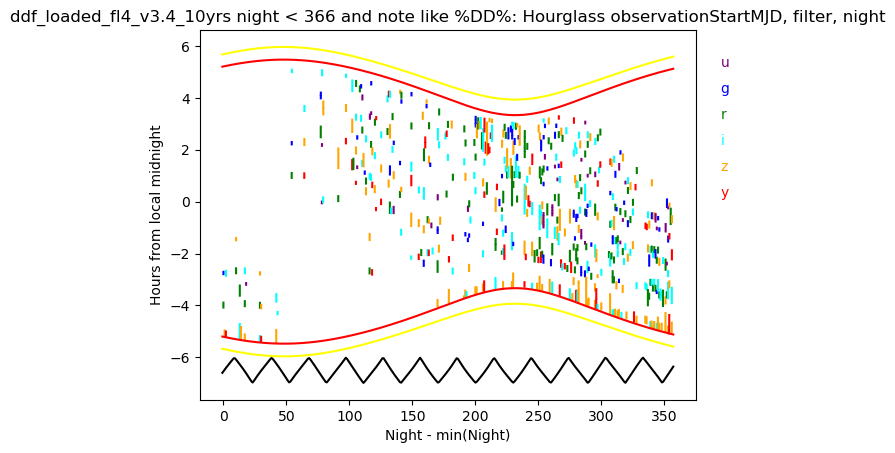

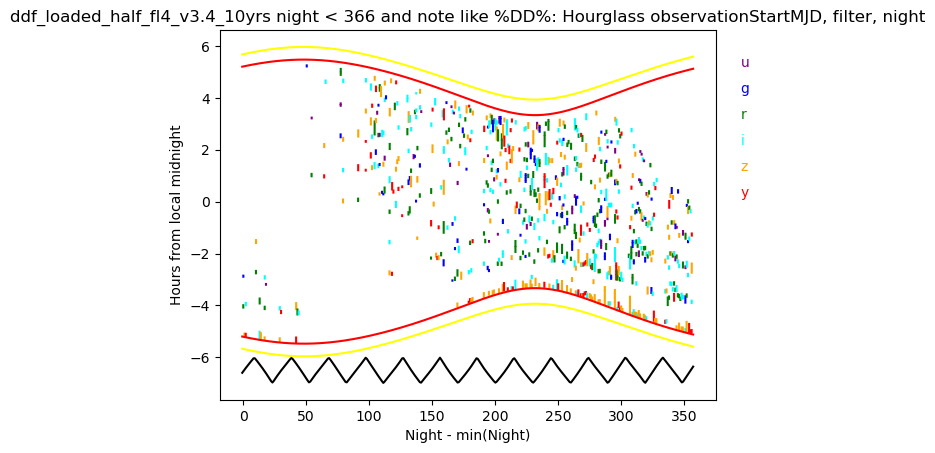

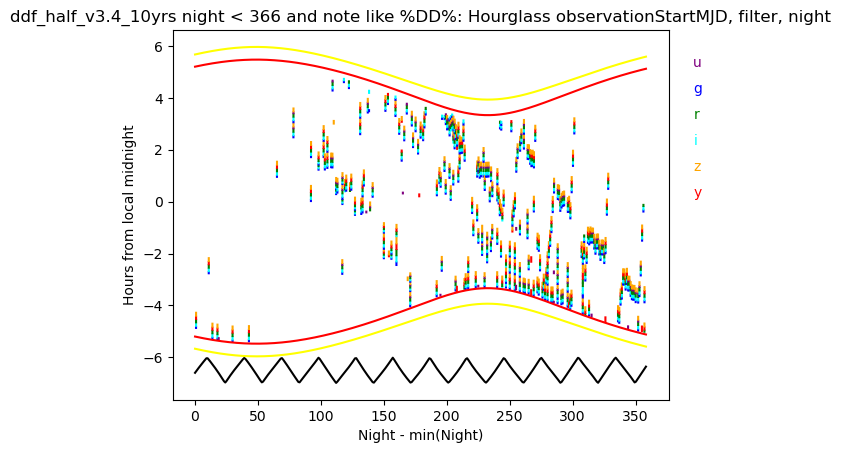

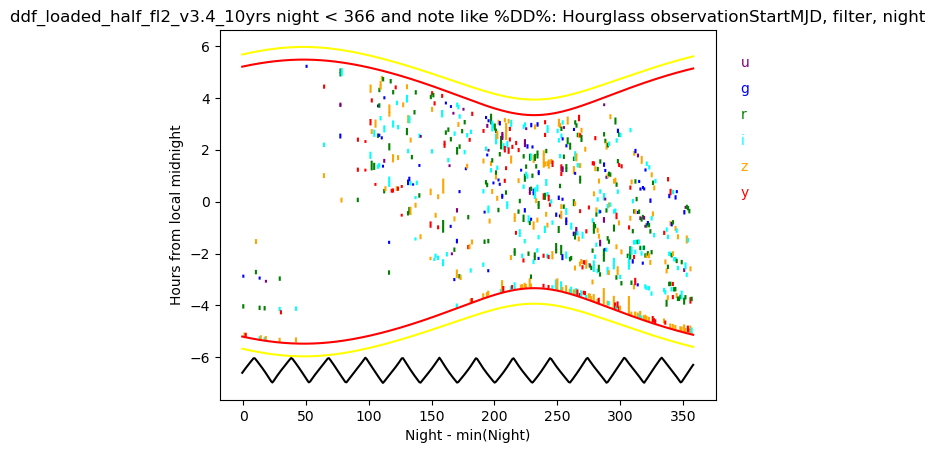

In [4]:
for db in dbs:
    run_name = os.path.basename(db).replace('.db', '')

    bundle_list = []
    
    slicer = maf.HourglassSlicer()
    metric = maf.HourglassMetric()

    bundle = maf.MetricBundle(
            metric,
            slicer,
            ' night < 366 and note like "%DD%"',run_name=run_name
        )
    bundle_list.append(bundle)


    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, db, 'ddf_loaded')
    mbg.run_all()
    mbg.plot_all(closefigs=False)

In [5]:
ddf_array = generate_ddf_scheduled_obs()

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


In [6]:
pd.DataFrame(ddf_array)

,ID,RA,dec,mjd,flush_by_mjd,exptime,filter,rotSkyPos,rotTelPos,rotTelPos_backup,...,target,mjd_tol,dist_tol,alt_min,alt_max,HA_max,HA_min,sun_alt_max,observed,scripted_id
0,0,0.164934,-0.767945,60817.418750,60819.418750,30.0,u,0.0,0.0,0.0,...,ELAISS1,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,0
1,0,0.164934,-0.767945,60817.418750,60819.418750,30.0,u,0.0,0.0,0.0,...,ELAISS1,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,1
2,0,0.164934,-0.767945,60817.418750,60819.418750,30.0,u,0.0,0.0,0.0,...,ELAISS1,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,2
3,0,0.164934,-0.767945,60817.418750,60819.418750,30.0,u,0.0,0.0,0.0,...,ELAISS1,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,3
4,0,0.164934,-0.767945,60817.418750,60819.418750,30.0,u,0.0,0.0,0.0,...,ELAISS1,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,0,1.110029,-0.830777,64425.991666,64427.991666,30.0,y,0.0,0.0,0.0,...,EDFS_b,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,167995
167996,0,1.110029,-0.830777,64425.991666,64427.991666,30.0,y,0.0,0.0,0.0,...,EDFS_b,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,167996
167997,0,1.110029,-0.830777,64425.991666,64427.991666,30.0,y,0.0,0.0,0.0,...,EDFS_b,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,167997
167998,0,1.110029,-0.830777,64425.991666,64427.991666,30.0,y,0.0,0.0,0.0,...,EDFS_b,0.010417,0.05236,0.436332,1.48353,3.0,21.0,-0.314159,False,167998


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


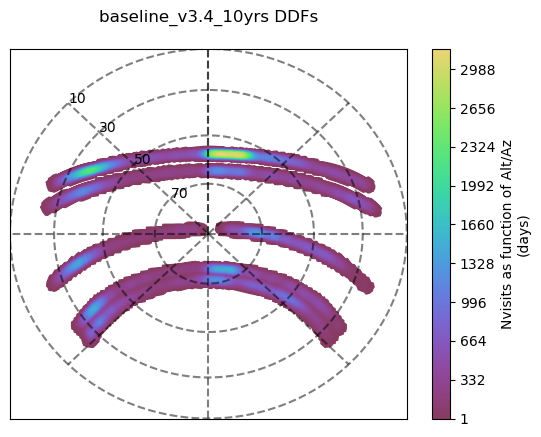

In [7]:
nside = 64
for db in [dbs[0]]:
    run_name = os.path.basename(db).replace('.db', '')

    bundle_list = []
    
    slicer = slicers.HealpixSlicer(lon_col="azimuth", lat_col="altitude",
        nside=nside,
        use_cache=False,
    )
    metric = metrics.CountMetric("night", metric_name="Nvisits as function of Alt/Az")
    plotFuncs = [plots.LambertSkyMap()]

    plotDict = {'title': run_name + ' DDFs'} # {"norm": "log"}

    sql = "note like '%DD%'"

    bundle = maf.metric_bundles.MetricBundle(
            metric,
            slicer,
            sql,
            plot_funcs=plotFuncs,
            plot_dict=plotDict,
        run_name=run_name
        )
    
    bundle_list.append(bundle)
    
    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, db, 'ddf_loaded')
    mbg.run_all()
    mbg.plot_all(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 1923 bins, returning 200
  warnings.warn(


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


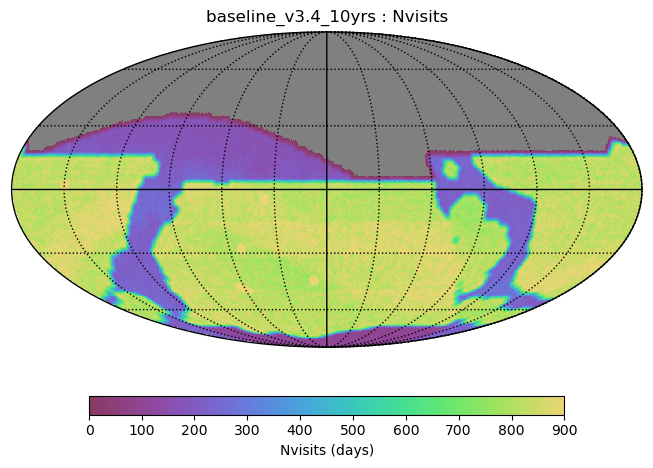

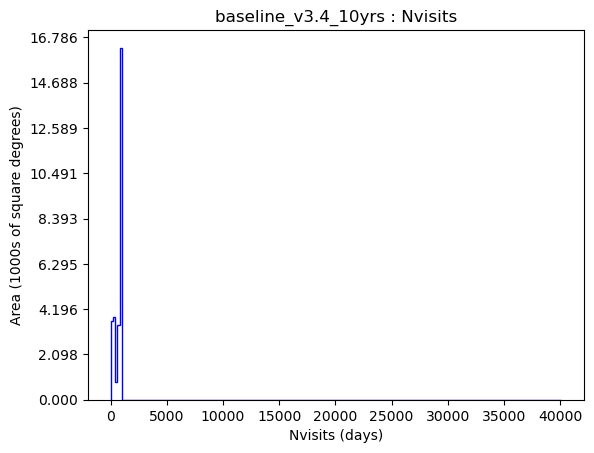

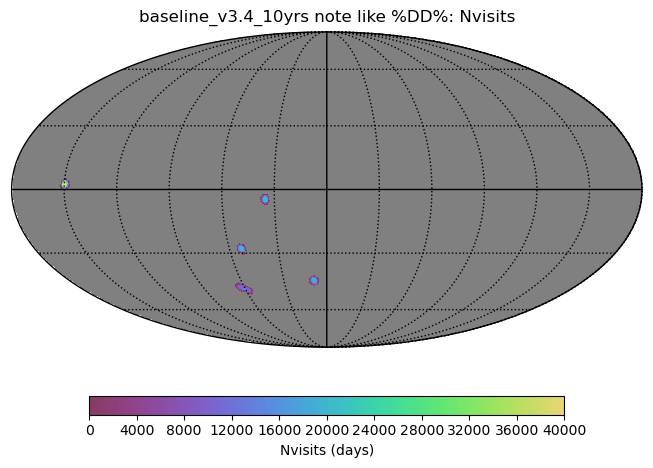

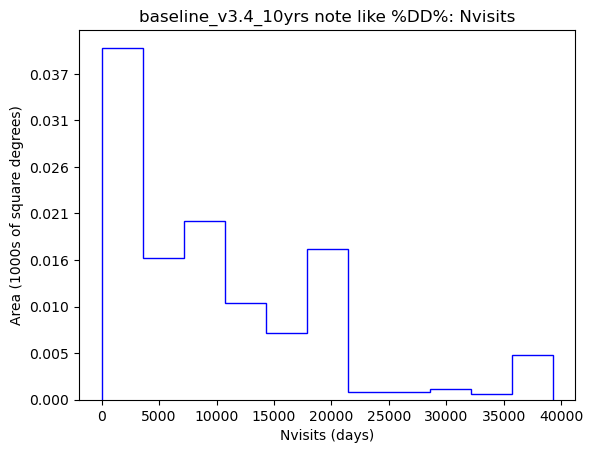

In [10]:

sql_dict = {'': 900, "note like '%DD%'": 40000}

for sql in sql_dict:
    db = dbs[0]
    run_name = os.path.basename(db).replace('.db', '')

    bundle_list = []
    
    slicer = slicers.HealpixSlicer()
    metric = metrics.CountMetric("night", metric_name="Nvisits")

    plot_dict={'color_max': sql_dict[sql]}

    bundle = maf.metric_bundles.MetricBundle(
            metric,
            slicer,
            sql,
        plot_dict=plot_dict, run_name=run_name
        )
    
    bundle_list.append(bundle)
    
    bd = maf.make_bundles_dict_from_list(bundle_list)
    mbg = maf.MetricBundleGroup(bd, db, 'ddf_loaded')
    mbg.run_all()
    mbg.plot_all(closefigs=False)